In [ ]:
# Contribute by Tomas Grahn

In [2]:
import pandas as pd

# Read the tab-separated file into a DataFrame
df = pd.read_csv('labels.txt', sep="\t")
df.head()

,Clip,Start,End
0,1,47,50
1,2,97,100
2,3,128,131
3,4,93,96
4,5,32,34


     Clip Fall Start Fall End  Fall Duration
0       1      46.65    49.15           2.50
1       2       11.9     14.2           2.30
2       3       2.65        5           2.35
3       4        0.4      1.4           1.00
4       5        0.9     3.15           2.25
..    ...        ...      ...            ...
115   116          0      2.1           2.10
116   117          0      1.6           1.60
117   118       1.15        2           0.85
118   119          1        2           1.00
119   120        2.9     5.52           2.62

[118 rows x 4 columns]


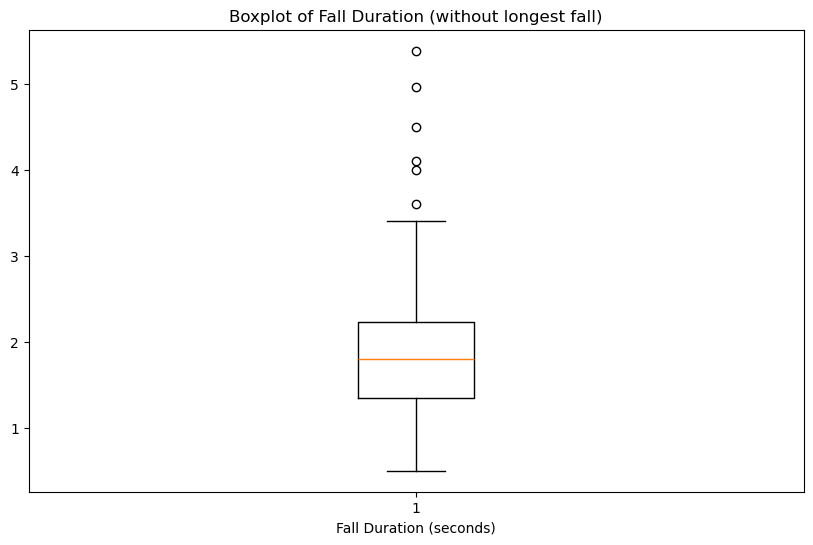

[2.5, 2.299999999999999, 2.35, 0.9999999999999999, 2.25, 0.65, 1.6, 1.25, 1.7999999999999998, 1.2999999999999998, 3.4, 1.5999999999999996, 1.5, 2.0, 1.2999999999999998, 2.5, 1.2999999999999998, 1.7999999999999998, 1.6, 1.0, 1.9, 1.2999999999999998, 3.3999999999999995, 1.4, 1.75, 0.7999999999999998, 1.9, 2.5, 2.8000000000000003, 1.5, 2.1, 1.9000000000000004, 0.5000000000000004, 4.5, 1.2399999999999998, 5.385000000000001, 1.8499999999999996, 4.0, 2.001, 1.9, 1.75, 0.9, 0.9, 1.8000000000000003, 1.4500000000000002, 0.75, 1.4, 1.75, 4.1, 2.2, 1.9500000000000002, 2.0, 1.25, 1.25, 1.5999999999999996, 1.54, 1.3499999999999999, 1.0499999999999998, 2.6, 2.5, 2.6, 1.25, 3.0800000000000005, 2.52, 2.1, 1.3399999999999999, 4.96, nan, 1.6400000000000001, 1.9000000000000004, 1.5, 2.24, 1.7999999999999998, 1.2, 1.68, 2.5, 1.7000000000000002, 1.3599999999999994, 2.4599999999999995, 1.0999999999999996, 1.200000000000001, 2.0, 1.3000000000000003, 2.08, 1.1, 3.6, 0.7000000000000001, 1.0499999999999998, 1.7

In [31]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define directories and CSV file
fall_dir = "../RFDS/originals/fall"
csv_file = "../RFDS/Labels.csv"

# Load the fall event data
fall_data = pd.read_csv(csv_file)

# Function to extract time from video
def extract_time_from_video(clip_dir, clip_int):
    for filename in os.listdir(clip_dir):
        if f"fall_{clip_int:03d}" in filename:
            video_file = os.path.join(clip_dir, filename)
            cap = cv2.VideoCapture(video_file)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            duration = frame_count / fps
            return duration

# Adjust Fall Start and Fall End times
for index, row in fall_data.iterrows():
    if row['Fall Start'] == 'START':
        fall_data.at[index, 'Fall Start'] = 0
    if row['Fall End'] == 'END':
        clip_int = row['Clip']
        duration = extract_time_from_video(fall_dir, clip_int)
        fall_data.at[index, 'Fall End'] = duration

# Calculate Fall Duration
#fall_data['Fall Duration'] = fall_data['Fall End'] - fall_data['Fall Start']
# Calculate Fall Duration
fall_data['Fall Duration'] = fall_data['Fall End'].astype(float) - fall_data['Fall Start'].astype(float)
# Create boxplot for fall duration
# Print the fall with the longest duration
longest_fall = fall_data.loc[fall_data['Fall Duration'].idxmax()]
fall_data_without_longest = fall_data.drop(fall_data['Fall Duration'].idxmax())
a = [2.5, 2.299999999999999, 2.35, 0.9999999999999999, 2.25, 0.65, 1.6, 1.25, 1.7999999999999998, 1.2999999999999998, 3.4, 1.5999999999999996, 1.5, 2.0, 1.2999999999999998, 2.5, 1.2999999999999998, 1.7999999999999998, 1.6, 1.0, 1.9, 1.2999999999999998, 3.3999999999999995, 1.4, 1.75, 0.7999999999999998, 1.9, 2.5, 2.8000000000000003, 1.5, 2.1, 1.9000000000000004, 0.5000000000000004, 4.5, 1.2399999999999998, 5.385000000000001, 1.8499999999999996, 4.0, 2.001, 1.9, 1.75, 0.9, 0.9, 1.8000000000000003, 1.4500000000000002, 0.75, 1.4, 1.75, 4.1, 2.2, 1.9500000000000002, 2.0, 1.25, 1.25, 1.5999999999999996, 1.54, 1.3499999999999999, 1.0499999999999998, 2.6, 2.5, 2.6, 1.25, 3.0800000000000005, 2.52, 2.1, 1.3399999999999999, 4.96, 1.6400000000000001, 1.9000000000000004, 1.5, 2.24, 1.7999999999999998, 1.2, 1.68, 2.5, 1.7000000000000002, 1.3599999999999994, 2.4599999999999995, 1.0999999999999996, 1.200000000000001, 2.0, 1.3000000000000003, 2.08, 1.1, 3.6, 0.7000000000000001, 1.0499999999999998, 1.7999999999999998, 2.0, 1.4, 2.6999999999999993, 0.9, 2.56, 2.15, 1.4500000000000002, 2.1, 1.6999999999999997, 1.7999999999999998, 1.9799999999999995, 2.4, 3.34, 1.9, 2.19, 1.7000000000000002, 1.6, 1.6, 1.5, 2.5, 1.15, 2.1, 1.7999999999999998, 1.7999999999999998, 2.4, 2.1, 1.6, 0.8500000000000001, 1.0, 2.6199999999999997]
print(fall_data_without_longest.dropna())
# Create boxplot for fall duration without the longest fall
plt.figure(figsize=(10,6))
plt.boxplot(a)
plt.title('Boxplot of Fall Duration (without longest fall)')
plt.xlabel('Fall Duration (seconds)')
plt.show()
print(fall_data_without_longest['Fall Duration'].tolist())

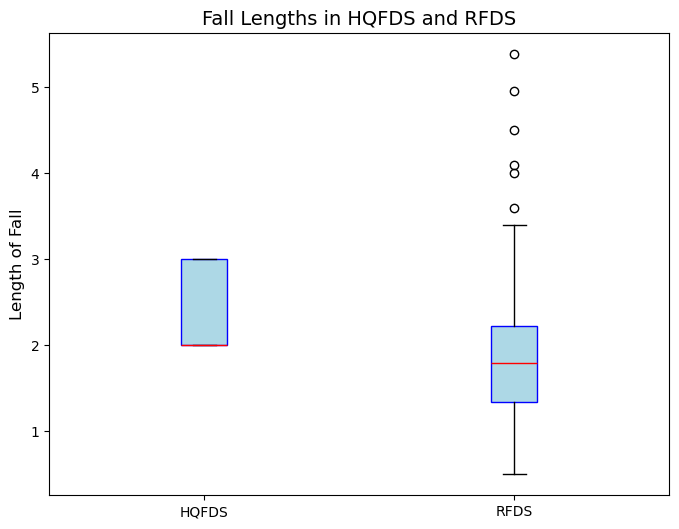

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the difference between Start and End columns
df['Difference'] = df['End'] - df['Start']

# Create a boxplot for the Difference column
data_to_plot = [df['Difference'], a]

# Create a boxplot for both datasets
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red'))

# Add labels for the two boxplots
plt.xticks([1, 2], ['HQFDS', 'RFDS'])

# Add title and labels
plt.title("Fall Lengths in HQFDS and RFDS", fontsize=14)
plt.ylabel("Length of Fall", fontsize=12)

# Show the plot
plt.show()
